

We are solving 1d heat equation with no volumetric heat source and with the diffusivity equal to 1:

$$
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial t^2}
$$


Boundary conditions and the initial condition are:

$$
u(0,t) = u_0
$$

$$
u(1,t) = 0
$$

$$
u(x, 0) = u_0
$$

We have inhomogenous boundary conditions, therefore, we have to perform change of variables:

$$
v(x,t) = u(x,t) - u_e(x)
$$

And solve for:

$$
\frac{\partial v}{\partial t} = \frac{\partial^2 v}{\partial t^2}
$$

$$
v(0,t) = 0
$$

$$
v(1,t) = 0
$$

$$
v(x, 0) = u_0 -u_e(x)
$$

where u_e is the equalibrium temperature:

$$
\lim_{t \to\infty} u(x,t) = u_e(x) = u_0(1-x)
$$

Using a method of separtion of variables we get to the general solution:

$$
v(x,t) = \sum\limits_{n=1}^\infty B_n sin(n\pi x) e^{-n^2\pi^2t}
$$

$$
B_n = \int_{0}^1 sin(n\pi x)v(x,0) dx = - \frac{2u_0}{n\pi} (-1)^n
$$

Giving the final solution:

$$
u(x,t) = v(x,t) + u_e(x) = v(x,t) + u_0(1-x)
$$

$$
u(x,t) = -\frac{2u_0}{\pi} \sum\limits_{n=1}^\infty \frac{(-1)^n}{n} sin(n\pi x) e^{-n^2 \pi^2 t} + u_0(1-x)
$$

Taking the first dominant term in the series we have the analytic solution to the PDE:

$$
u(x,t) = \frac{2u_0}{\pi} sin(\pi x) e^{-\pi^2 t}+ u_0(1-x)
$$

for time condition: 

$$
t \geq \frac{1}{\pi^2}
$$


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, prange

Set the lists and define temperature at right boundary

In [19]:
u0 = 5
u = np.empty([101, 101])

x_list = np.linspace(0, 1, 101)
t_list = np.linspace(0, 1, 101)
dt = t_list[-1]/(len(t_list)-1)

Define the function

In [20]:
@jit
def eval_analytic_1d(u):
    for n in prange(0, 101):
        for i in prange(0, 101):
            u[n,i] = u0 * (1-x_list[i]) + (2*u0/np.pi) * np.sin(np.pi*x_list[i]) * np.exp(-np.pi**2 * t_list[n])
    return u

eval_analytic_1d(u)

array([[5.00000000e+00, 5.04998355e+00, 5.09986843e+00, ...,
        2.99868431e-01, 1.49983551e-01, 3.89817183e-16],
       [5.00000000e+00, 5.04058690e+00, 5.08108441e+00, ...,
        2.81084407e-01, 1.40586903e-01, 3.53181406e-16],
       [5.00000000e+00, 5.03207337e+00, 5.06406574e+00, ...,
        2.64065743e-01, 1.32073370e-01, 3.19988731e-16],
       ...,
       [5.00000000e+00, 4.95000630e+00, 4.90001259e+00, ...,
        1.00012594e-01, 5.00063000e-02, 2.45624986e-20],
       [5.00000000e+00, 4.95000571e+00, 4.90001141e+00, ...,
        1.00011410e-01, 5.00057079e-02, 2.22540673e-20],
       [5.00000000e+00, 4.95000517e+00, 4.90001034e+00, ...,
        1.00010338e-01, 5.00051715e-02, 2.01625868e-20]])

# 2D plots
Note: time must satisfy condition: t >= 1/pi^2 for reasons left as an exercise
for the reader

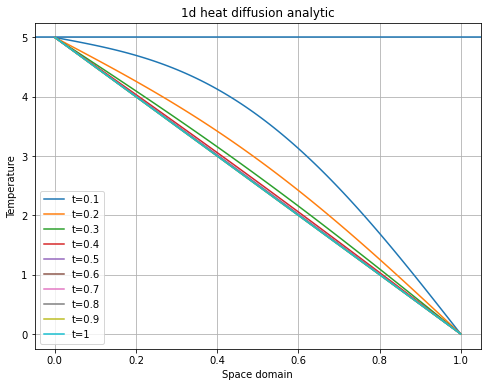

In [21]:
fig = plt.figure(figsize=(8,6))
num_of_slice = 10
plt.axhline(y=5)
for i in range(10, len(u), len(u)//num_of_slice ):
    plt.plot(x_list, u[i], label=f't={i*dt :.1g}')

plt.title('1d heat diffusion analytic')
plt.xlabel('Space domain')
plt.ylabel('Temperature')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 3D plots

size of t_list: (101, 101), size of x_list: (101, 101), size of u: (101, 101)


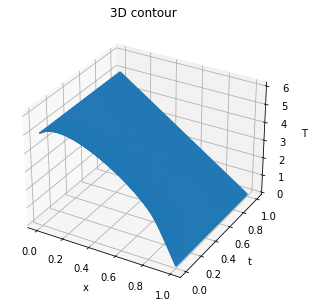

In [22]:
x_list, t_list = np.meshgrid(x_list,t_list)
print(f'size of t_list: {t_list.shape}, size of x_list: {x_list.shape}, size of u: {u.shape}')

fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')

ax.plot_wireframe(x_list, t_list, u, rcount=t_list.shape[1], ccount=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('T')
ax.set_title('3D contour')
plt.show()

# 3D contour

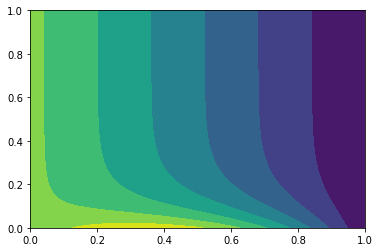

In [23]:
plt.contourf(x_list, t_list, u)
plt.show()